# 線形回帰

## インポート

In [1]:
from sklearn.datasets import load_linnerud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## データの確認

In [2]:
# 説明変数
load_linnerud = load_linnerud()
data = pd.DataFrame(load_linnerud.data, columns=load_linnerud.feature_names)
# target = pd.DataFrame(data.target, columns=data.target_names)
print("データ数:"+ str(data.shape))
data.head()

データ数:(20, 3)


,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


Weight　体重\
Waist　ウエスト (胴囲)\
Pulse　脈拍

In [3]:
# 目的変数
target = pd.DataFrame(load_linnerud.target, columns=load_linnerud.target_names)
print("データ数:"+ str(target.shape))
target.head()

データ数:(20, 3)


,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


Chins 懸垂の回数\
Situps 腹筋の回数\
Jumps 跳躍

In [4]:
df = pd.concat([data, target], axis = 1)
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [5]:
df.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


In [6]:
df.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

## **[今回の目的]**
### **Situps 腹筋の回数を使用して、最も当てはまりの良い説明変数、直線で表せそうなものを見つけたい**

## 試しに適当に変数を選択

In [7]:
#説明変数
X = df[["Weight"]]

#目的変数
y = df[["Situps"]]

## 単回帰分析の実施

In [8]:
#線形回帰モデルを定義
model = LinearRegression()

#学習実行
model.fit(X,y)

LinearRegression()

## パラメータの取り出し

In [9]:
#回帰係数（傾き）
print("モデル関数の回帰係数：" , model.coef_)
#切片（誤差）
print("モデル関数の切片：" , model.intercept_)

モデル関数の回帰係数： [[-1.24949062]]
モデル関数の切片： [368.70902545]


#### よって、説明変数: Weight(x) と目的変数: Situps(y)は
### y = -1.2494*x + 368.7
#### という予測モデルを構築できた

## モデルの評価

In [10]:
#回帰したものと比較
y_pred = model.predict(X)
print(y_pred[:5], y[:5])
#決定係数（回帰分析の精度を表す指標）
print("決定係数 R^2：", model.score(X, y))

[[130.05631626]
 [132.55529751]
 [127.55733501]
 [166.29154436]
 [132.55529751]]    Situps
0   162.0
1   110.0
2   101.0
3   105.0
4   155.0
決定係数 R^2： 0.24313148099402093


## <font color="red">あんまり、適切に予測できている直線とはいいがたい....</font>

## 損失関数を用いた誤差の計算

In [11]:
mse = mean_squared_error(y_true=y, y_pred=y_pred)
print("mse:", mse)

mse: 2814.6785997340876


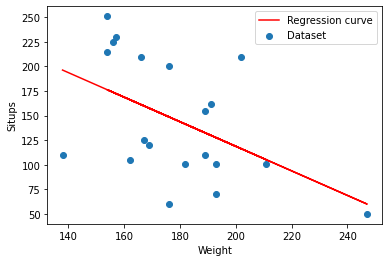

In [12]:
#横軸をfixed acidity（酒石酸濃度）、縦軸をpHにした散布図
plt.scatter(X, y, label = "Dataset")
plt.xlabel('Weight')
plt.ylabel('Situps')
#単回帰分析で計算した回帰直線
plt.plot(X, y_pred, label = "Regression curve", color="red")

#凡例の設置
plt.legend()

#グラフを表示する
plt.show()

## 相関を見て考えてみる

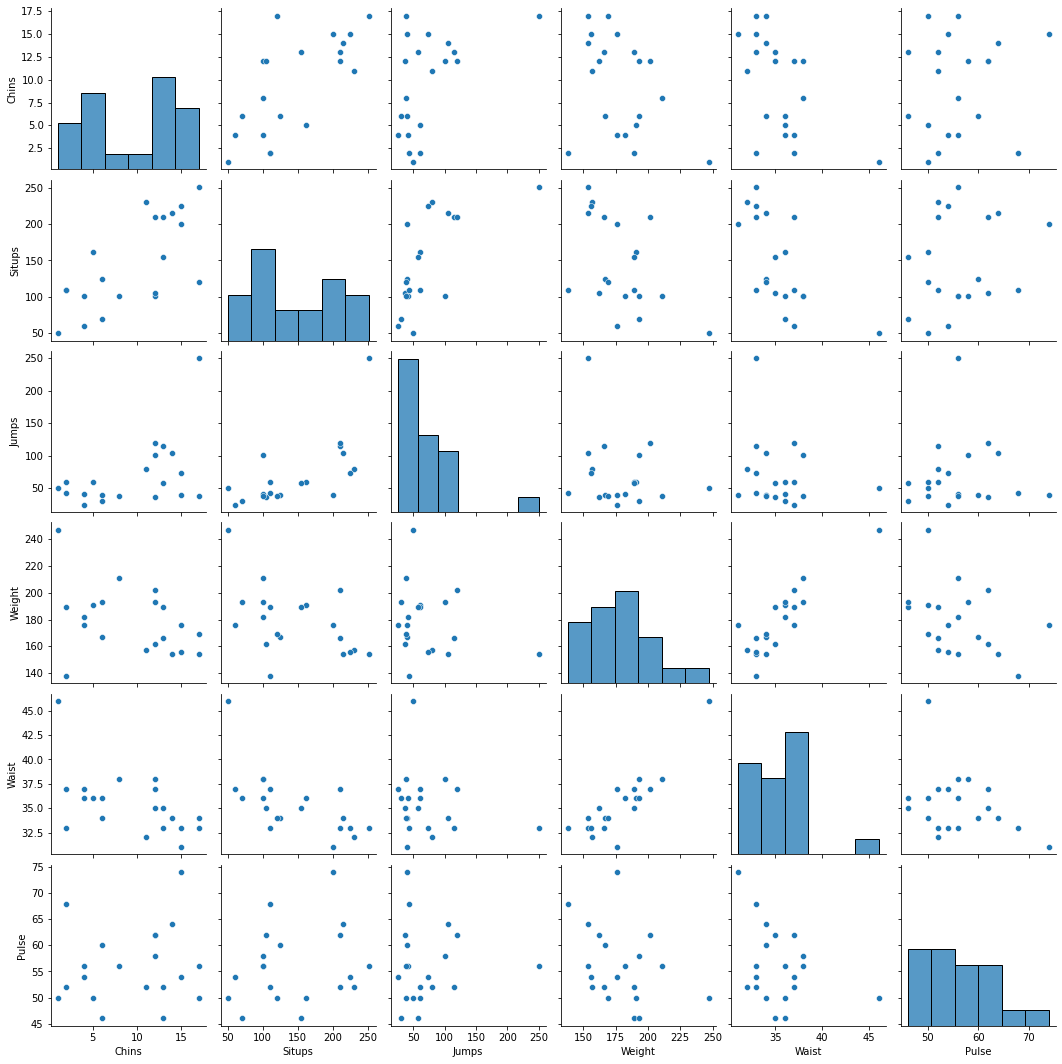

In [13]:
sns.pairplot(df)

<AxesSubplot:>

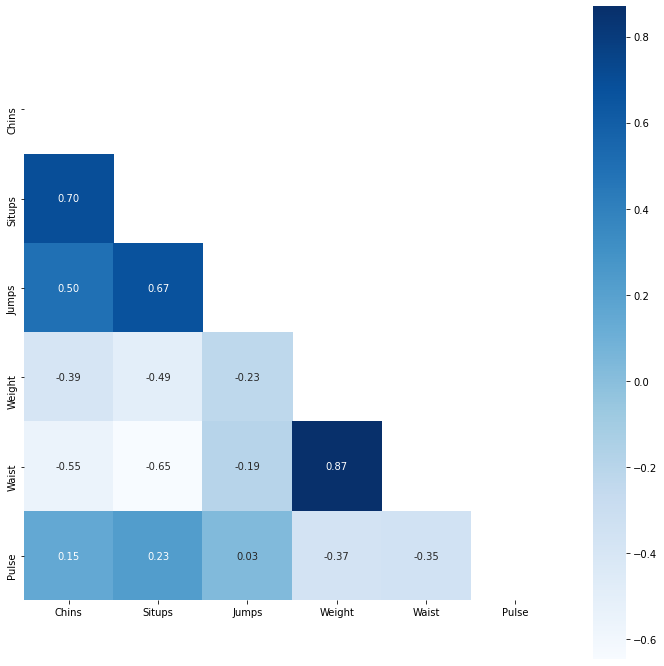

In [14]:
#相関行列を作成
corr_matrix1 = df.corr()
fig = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(corr_matrix1)
mask[np.triu_indices_from(corr_matrix1)] = True
sns.heatmap(corr_matrix1, mask=mask, annot=True,fmt='.2f',cmap='Blues',square=True)

### <font color="red">説明変数: Waist と目的変数: Situpsの相関係数が最も相関が強い</font>
### [予想]　最もあてはまりのよい直線が引けそう

## 説明変数と目的変数の取り出し

In [15]:
#説明変数
X = df[["Waist"]]

#目的変数
y = df[["Situps"]]

## 単回帰分析の実施

In [16]:
#線形回帰モデルを定義
model = LinearRegression()

#学習実行
model.fit(X,y)

LinearRegression()

## パラメータの取り出し

In [17]:
#回帰係数（傾き）
print("モデル関数の回帰係数：" , model.coef_)
#切片（誤差）
print("モデル関数の切片：" , model.intercept_)

モデル関数の回帰係数： [[-12.61498973]]
モデル関数の切片： [592.12063655]


#### よって、説明変数: Waist(x) と目的変数: Situps(y)は
### y = -12.615*x + 592.12
#### という予測モデルを構築できた

## モデルの評価

In [18]:
#回帰したものと比較
y_pred = model.predict(X)
print(y_pred[:5], y[:5])
#決定係数（回帰分析の精度を表す指標）
print("決定係数 R^2：", model.score(X, y))

[[137.98100616]
 [125.36601643]
 [112.75102669]
 [150.59599589]
 [150.59599589]]    Situps
0   162.0
1   110.0
2   101.0
3   105.0
4   155.0
決定係数 R^2： 0.41679681366364896


## <font color="red">先ほどよりは、適切に予測できている直線とはいえるが、まだまだ....</font>

## 損失関数を用いた誤差の計算

In [19]:
mse = mean_squared_error(y_true=y, y_pred=y_pred)
print("mse:", mse)

mse: 2168.843711498973


### さっきより誤差は小さくなっているが、まだまだ...

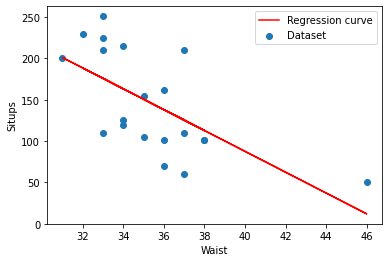

In [20]:
#横軸をfixed acidity（酒石酸濃度）、縦軸をpHにした散布図
plt.scatter(X, y, label = "Dataset")
plt.xlabel('Waist')
plt.ylabel('Situps')
#単回帰分析で計算した回帰直線
plt.plot(X, y_pred, label = "Regression curve", color="red")

#凡例の設置
plt.legend()

#グラフを表示する
plt.show()

## 念のため、Pulseもやってみる
## [予測]　相関が小さいから、決定係数の値が最も低く、mseは最大になる

In [21]:
#説明変数
X = df[["Pulse"]]

#目的変数
y = df[["Situps"]]

## 単回帰分析の実施

In [22]:
#線形回帰モデルを定義
model = LinearRegression()

#学習実行
model.fit(X,y)

LinearRegression()

## パラメータの取り出し

In [23]:
#回帰係数（傾き）
print("モデル関数の回帰係数：" , model.coef_)
#切片（誤差）
print("モデル関数の切片：" , model.intercept_)

モデル関数の回帰係数： [[1.95272322]]
モデル関数の切片： [36.00222717]


#### よって、説明変数: Waist(x) と目的変数: Situps(y)は
### y = 1.9527*x + 36.0
#### という予測モデルを構築できた

## モデルの評価

In [24]:
#回帰したものと比較
y_pred = model.predict(X)
print(y_pred[:5], y[:5])
#決定係数（回帰分析の精度を表す指標）
print("決定係数 R^2：", model.score(X, y))

[[133.63838834]
 [137.54383478]
 [149.26017412]
 [157.07106702]
 [125.82749544]]    Situps
0   162.0
1   110.0
2   101.0
3   105.0
4   155.0
決定係数 R^2： 0.050642138800673364


## <font color="red">やはり、決定係数は一番低い....</font>

## 損失関数を用いた誤差の計算

In [25]:
mse = mean_squared_error(y_true=y, y_pred=y_pred)
print("mse:", mse)

mse: 3530.517108726463


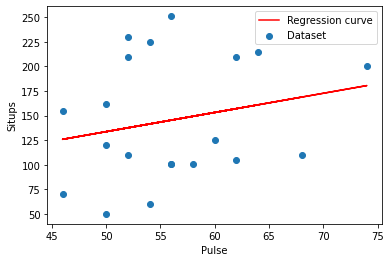

In [26]:
#横軸をfixed acidity（酒石酸濃度）、縦軸をpHにした散布図
plt.scatter(X, y, label = "Dataset")
plt.xlabel('Pulse')
plt.ylabel('Situps')
#単回帰分析で計算した回帰直線
plt.plot(X, y_pred, label = "Regression curve", color="red")

#凡例の設置
plt.legend()

#グラフを表示する
plt.show()

### mseももちろん高い